# Chapter 8. Dimensionality Reduction
* ***Curse of dimensionality*: Many Machine Learning Porblems involve thousands or even millions of features for each training instance. Not only do all these features make training extremely slow, but they can also make it much harder to find a good solution**
* **Reducing dimensionality does cause some information loss, so even though it will speed up training, it may make your system perform slightly worse**
* **If training is too slow, you should first try to train your system with the original data before considering using dimensionality reduction**
* **Dimensionality reduction is also extremely useful for data visualization.Reducing the number of dimensions down to two(or three) makes it possible to plot a condensed view of a high-dimenional training set on a graph and often gain some important insights by visually detecing patterns, such as clusters**

## Curse of Dimensionality
* **The more dimensions the training set has, the greater the risk of overfitting it**
* **One solution to the curse of the dimensionaluty could be to increase the size of the training set to reach a sufficient density of training instaces**
* **In practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions**

## Main Approaches for Dimensionality Reduction

### Projection
* **In most real-world problems, training instances are *spread* out uniformly across all dimensions. As a result, all training instances lie within(or close to) a much lower-dimensional *subspace* of the high-dimensional space**

### Manifold Learning
* **A *d*-dimensional manifolf is a part of an *n*-dimensional space(where *d\<n*) that locallay resembles a d-dimensional hyperplane**
* ***Manifold Learning*: Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie**
    * **Relies on the *manifold assumption(manifold hypothesis):* Holds that most real-world high dimensional datasets lie close to a much lower-dimensional manifold**
    * **Assumption2: the task at hand will be simpler if expressed in the lower-dimensional space of the manifold(May not always hold)**

**Reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better of simpler solution; it all depends on the dataset.**

## PCA
### Preserving the Variance
* **It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections**
* **Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis**

### Principal Components
* **PCA identifies the axis that accounts for the largest amount of varaince in the training set**
* **It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance**
* **The ith axis is called the ith *principal component*(PC) of the data**
* **For each principal component, PCA finds a zero-centered unit vector pointing in the direction of the PC. Since two opposing unit vectors lie on the same axis, the direction of the unit vectors returned by PCA is not stable**
* **We can use a standard matrix factorization technique called *Singular Value Decomposition*(SVD) that can decompose the training set matrix *X* into the matrix multiplication of three matrices.**

**Build a 3D model**

In [4]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [2]:
import numpy as np

In [5]:
X_centered=X-X.mean(axis=0)

In [6]:
U,s,Vt=np.linalg.svd(X_centered)

In [7]:
c1=Vt.T[:,0]

In [9]:
c2=Vt.T[:,1]

In [10]:
c1

array([0.93636116, 0.29854881, 0.18465208])

In [11]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

**PCA assumes that the dataset is centered around the origin. If you use SK-Learn's PCA, SK-Learn will take care of centering the data for you**

### Projecting Down to d Dimensions
* **Once you have identifies all the principal components, you can reduce the dimensionality of the dataset down to *d* dimensions by projecting it onto the hyperplane defined by the first *d* components**

**Projects the trainning set onto the plane defined by the first two principal components**

In [12]:
W2=Vt.T[:,:2]

In [13]:
X2D=X_centered.dot(W2)

In [15]:
X2D[:10]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264]])

### Using Scikit-Learn

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA(n_components=2)

In [18]:
X2D=pca.fit_transform(X)

### Explained Variance Ratio
* **The ratio indicates the proportion of the dataset's variance taht lies along each principal component**

In [19]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

### Choosing the Right Number of Dimensions
* **Instead of arbitrarily choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance**

In [21]:
#computes the minimum number of dimensions required to preserve 95% of the training set's variance
pca=PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [23]:
d

2

In [24]:
pca=PCA(n_components=2)

In [25]:
pca.fit(X)

PCA(n_components=2)

In [26]:
X2D=pca.fit_transform(X)

In [27]:
import matplotlib.pyplot as plt

**Another option is to plot the explained variance as a function of the number of dimensions（simply plot cumsum)**

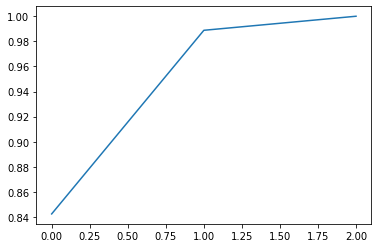

In [29]:
plt.plot(cumsum)
plt.show()

### PCA for Compression
* **After dimensionality reduction, the training set takes up much less space**
* **It is possible to decompress the reduced dataset back to the original dimension by appying the inverse trainsformation of the PCA projection**
* **The mean squred distance between the original data and teh reconstructed data is callled *reconstruction error***

In [30]:
pca=PCA(n_components=1)

In [31]:
X_reduced=pca.fit_transform(X)

In [32]:
X_recovered=pca.inverse_transform(X_reduced)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(X,X_recovered)

0.04769668680511293

### Randomized PCA
* **If you set the** svd_solver **hyperparameter to** "randomized", **SK-Learn uses a stochastic algorithm called** *Randomized PCA* **that quickly finds an approximation of the first** *d* **principal compoents, it is faster than the full SVD when** *d* **is much smaller than *n***

In [39]:
rnd_pca=PCA(n_components=1,svd_solver="randomized")

In [40]:
X_reduced=rnd_pca.fit_transform(X)

### Incremental PCA
* **Allows you to split the training set into mini-batches and feed and ICPA algorithm one mini-batch at a time**
* **You must call the** partial_fit( ) **method with each mini-batch, rather than the** fit( ) **method with the whole training set**

In [41]:
from sklearn.decomposition import IncrementalPCA

In [45]:
n_batches=1

In [46]:
inc_pca=IncrementalPCA(n_components=2)

In [47]:
for X_batch in np.array_split(X,n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced=inc_pca.transform(X)

In [50]:
X_reduced[:10]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264]])

**Alternatively, you can use NumPy's** memmap **class, which allows you to manipulate a large array stored in a binary file on disk if it were entirely in memory; the class loads only the data it needs in memory, when it needs it**

In [ ]:
X_mm=np.memmap(filename,dtype="float32",mode="readonly",shape=(m,n))

In [ ]:
batch_size=m//n_batches
inc_pca=IncrementalPCA(n_components=154,batch_size=batch_size)
inc_pca.fit(X_mm)

## Kernel PCA
* **Makes it possible to perform complex nonlinear projections for dimensionality reduction**

In [51]:
from sklearn.decomposition import KernelPCA

In [53]:
rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.04)

In [54]:
X_reduced=rbf_pca.fit_transform(X)

### Selecting a Kernel and Tuning Hyperparameters
* **Following code creates a two-step pipeline**
* **First, reducing the dimensionality to two dimensions using kPCA, then applying Logistic Regression for classification**
* **Then it uses** GridSearchCV **to fidn the best kernel and** gamma **value for kPCA in order to get the best classification accuracy at the end of the pipeline**

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [57]:
clf=Pipeline([
    ("kpca",KernelPCA(n_components=2)),
    ("Log_reg",LogisticRegression())
])

In [58]:
param_grid=[{
    "kpca_gamma":np.linspace(0.03,0.05,10),
    "kpca_kernel":["rbf","sigmoid"]
}]

In [59]:
grid_search=GridSearchCV(clf,param_grid,cv=3)

In [ ]:
grid_search.fit(X,y)

**The best kernel and hyperparameters are then availiable through the** best_params_ **variable**

In [ ]:
print(grid_search.best_params_)

**Another approach is to select the kernel and hyperparameters that yield the lowest reconstruction error**
   * **SK  Learn trains a supervised regression model, with the projected instance as the training set and the original instances as the targets**
   * **SK-Learn will do this automatically if you set** fit_inverse_transform=True

In [61]:
rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.0433,
                 fit_inverse_transform=True)

In [62]:
X_reduced=rbf_pca.fit_transform(X)

In [63]:
X_preimage=rbf_pca.inverse_transform(X_reduced)

In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_preimage)

5.408975126514001e-31

## LLE
* ***Locally Linear Embedding(LLE)*: A manifold learning technique**
* **LLE works by first measuring how much each training instance linearly relates to its closet neighbors(c.n.), and then looking for a low dimensional representation of the training set where these local relationships are best preserved**
* **This approach makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise**

In [65]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [66]:
from sklearn.manifold import LocallyLinearEmbedding
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_reduced=lle.fit_transform(X)

## Other Dimensionality Reduction Techniques
* **Random Projections**:
    * **Projects the data to a lower-dimensional space using a random linear projection**
    * **The quality of the dimensionality reduction depends on the number of instances and the target dimensionality, but not the initial dimensionality**
    * **In** Sklearn.random_projections
* **Multdimensional Scaling(MDS):**
    * **Reduces dimensionality while trying to preserve the distances between the instances**
* **Isomap:**
    * **Create a graphy by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the *geodesic distances* between the instances**
* **t-Distributed Stochastic Neighbor Embedding(t-SNE):**
    * **Reduces dimensionality while trying to keep similat instances close and dissimilar instances aprat**
    * **Mostly used for visulisation**
* **Linear Discriminat Analysis**
    * **Is a classification algorithm, but during training learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data**

In [67]:
%%bash
git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ch7_ensemble_learning_and_random_forest.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_checkpoints/
	Chapter  4 Training Model.docx
	Chapter 5 Support Vector Machines.docx
	Chapter 6 Decision Trees.docx
	Chapter 7 Ensemble Learning and Random Forest.docx
	bc.ipynb
	bc1.csv
	ch8_dimensionality_reduction.ipynb
	images/
	iris

no changes added to commit (use "git add" and/or "git commit -a")


In [68]:
%%bash
git add "ch8_dimensionality_reduction.ipynb"

In [69]:
%%bash
git commit -m"Add dimensionality reduction"

[master ca952ed] Add dimensionality reduction
 1 file changed, 1028 insertions(+)
 create mode 100644 ch8_dimensionality_reduction.ipynb


In [70]:
%%bash
git push

To https://github.com/lzeng11bc/MLProjectsSKLearn.git
   8988f93..ca952ed  master -> master
